In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define filepath
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

# read and creat dataframe from filepath
df = pd.read_csv(filepath, header=None)

# assingn names from first row to the columns
df.columns = df.iloc[0]

# remove first row
df.drop(0, inplace=True)

# showing five first rows
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,...,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,...,10.0,102.0,5500.0,24,30,13950.0,9.791666666666666,Medium,0,1
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486304661220567,...,8.0,115.0,5500.0,18,22,17450.0,13.055555555555555,Medium,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 1 to 201
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          201 non-null    object
 1   normalized-losses  201 non-null    object
 2   make               201 non-null    object
 3   aspiration         201 non-null    object
 4   num-of-doors       201 non-null    object
 5   body-style         201 non-null    object
 6   drive-wheels       201 non-null    object
 7   engine-location    201 non-null    object
 8   wheel-base         201 non-null    object
 9   length             201 non-null    object
 10  width              201 non-null    object
 11  height             201 non-null    object
 12  curb-weight        201 non-null    object
 13  engine-type        201 non-null    object
 14  num-of-cylinders   201 non-null    object
 15  engine-size        201 non-null    object
 16  fuel-system        201 non-null    object
 1

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# creating linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [6]:
# define "X" as a predictor and "Y" as a response variables 
X = df[['highway-mpg']]
Y = df['price']

In [7]:
X

,highway-mpg
1,27
2,27
3,26
4,30
5,22
...,...
197,28
198,25
199,23
200,27


In [8]:
# fit linear model using highway-mpg
lm.fit(X, Y)

LinearRegression()

In [9]:
# five first predictions
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [10]:
# intercept(a) value 
lm.intercept_

np.float64(38423.3058581574)

In [11]:
# slope(b) value
lm.coef_

array([-821.73337832])

In [12]:
# Question #1 a):
# create a linear regression object called 'lm1'
lm1 = LinearRegression()

In [13]:
# Question #1 b):
# Train the model using "engine-size" as the independent variable and "price" as the dependent variable?
X = df[['engine-size']]
Y = df[['price']]

In [14]:
# train lm1
lm1.fit(X,Y)

LinearRegression()

In [15]:
# Question #1 c):
# find the slope and intercept of the model
slope = lm1.coef_
intercept = lm1.intercept_
slope, intercept

(array([[166.86001569]]), array([-7963.33890628]))

In [16]:
# Question #1 d):
# what is the equation of the predicted line? 
#Yhat = intercept + slope*X
#Yhat = -7963.33 + 166.86 * df['engine-size']
Yhat = lm1.predict(X)
Yhat[0:3]


array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881]])

In [17]:
# Question #2 a): 
# Create and train multiple linear regression model "lm2" where the response variable is "price" and the predictor variable is "normalized-losses" and "highway-mpg"
lm2 = LinearRegression()
z = df[['normalized-losses', 'highway-mpg']]
Y = df['price']
Yhat = lm2.fit(z, Y )

In [18]:
# Question #2 b):
#find coefficient of the model
intersept = lm2.intercept_
slope = lm2.coef_
intersept , slope

(np.float64(38201.31327245727), array([   1.49789586, -820.45434016]))

In [19]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

(0.0, 48183.27455923874)

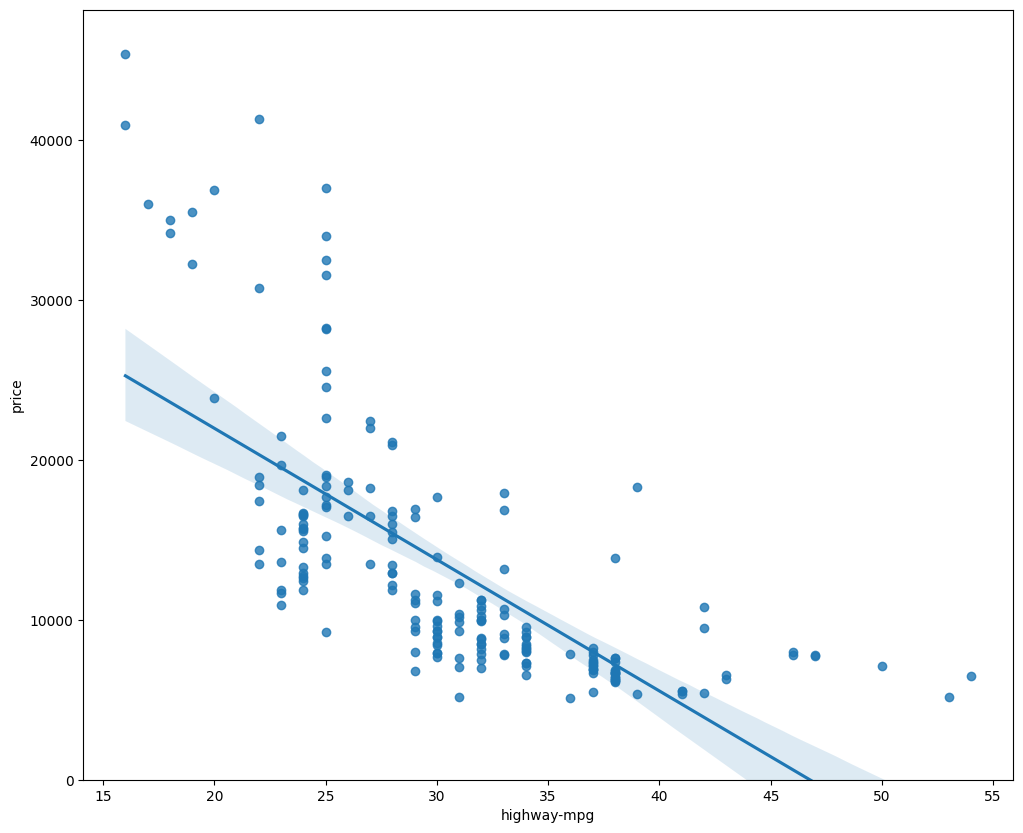

In [20]:
# To handle errors, Ensure both columns passed to x and y are numeric (int64 or float64).
# If some values in your columns are stored as strings, convert them:

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['highway-mpg'] = pd.to_numeric(df['highway-mpg'], errors='coerce')

width = 12
height = 10
plt.figure ( figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df )
plt.ylim(0,)

(0.0, 53963.35010769764)

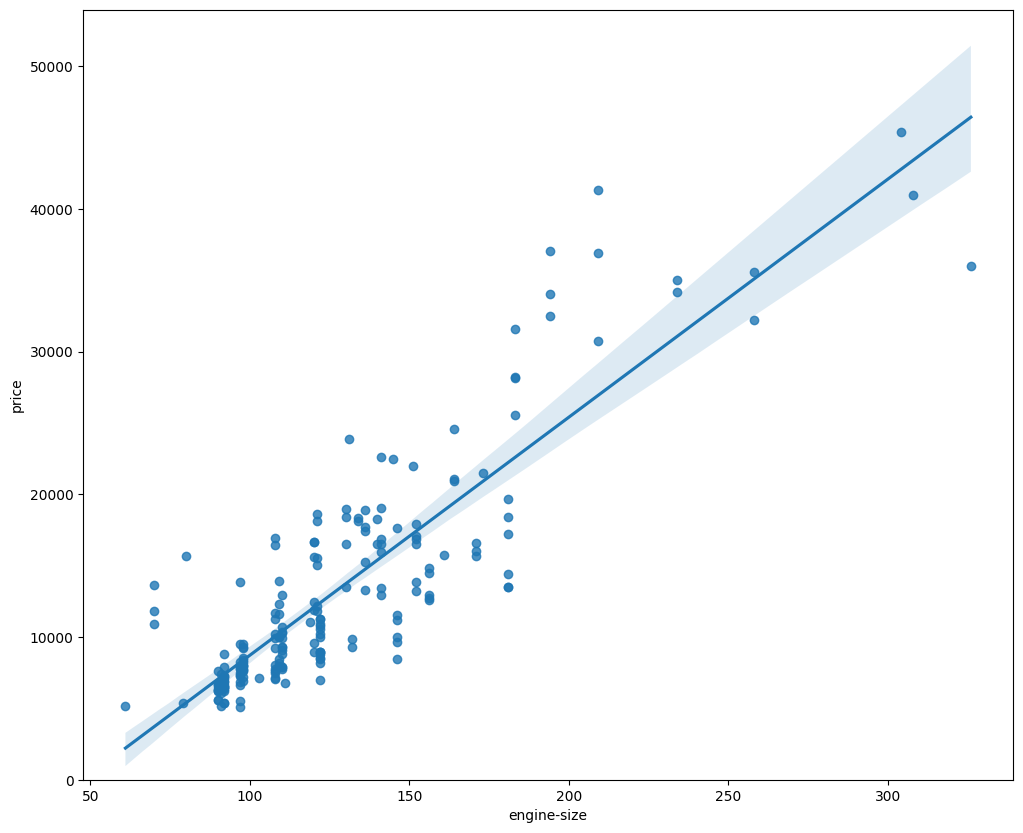

In [21]:
# To handle errors, Ensure both columns passed to x and y are numeric (int64 or float64).
# If some values in your columns are stored as strings, convert them:

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['engine-size'] = pd.to_numeric(df['engine-size'], errors='coerce')

width = 12
height = 10
plt.figure ( figsize=(width, height))
sns.regplot(x='engine-size', y='price', data=df )
plt.ylim(0,)

(0.0, 47414.1)

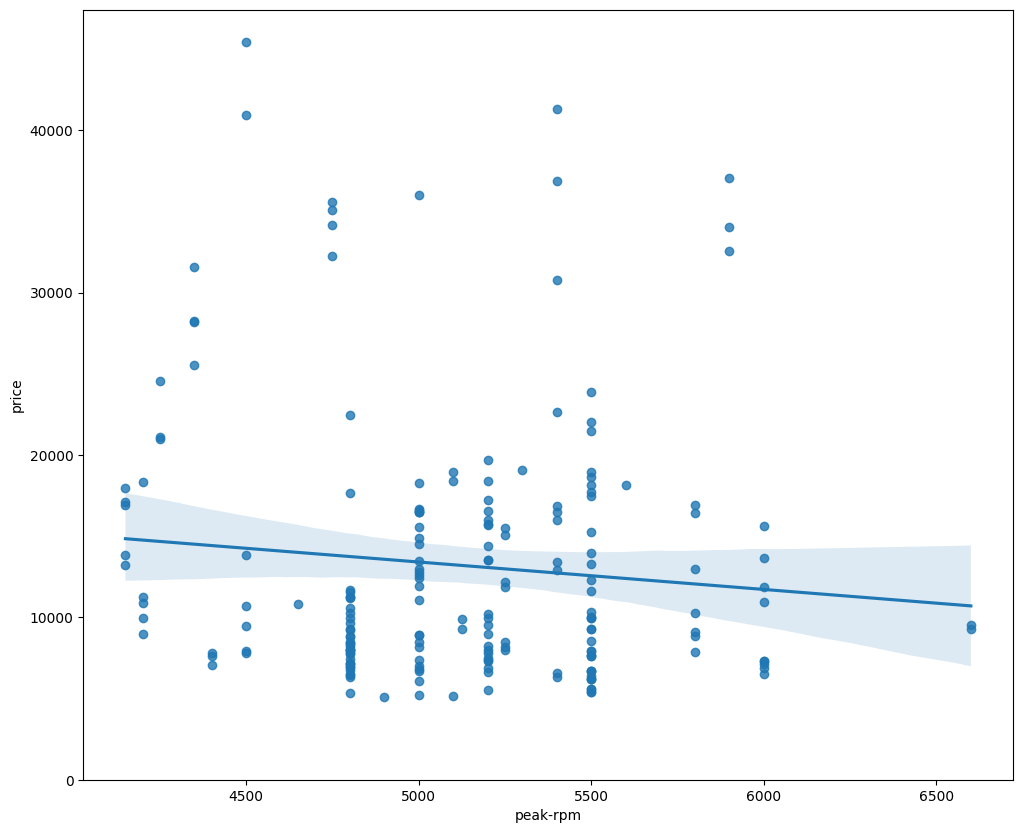

In [22]:
# To handle errors, Ensure both columns passed to x and y are numeric (int64 or float64).
# If some values in your columns are stored as strings, convert them:

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

width = 12
height = 10
plt.figure ( figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df )
plt.ylim(0,)

In [23]:
# Question #3:
#is "peak-rpm" or "highway-mpg" more strongly correlated with "price"?

df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
0,,,
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


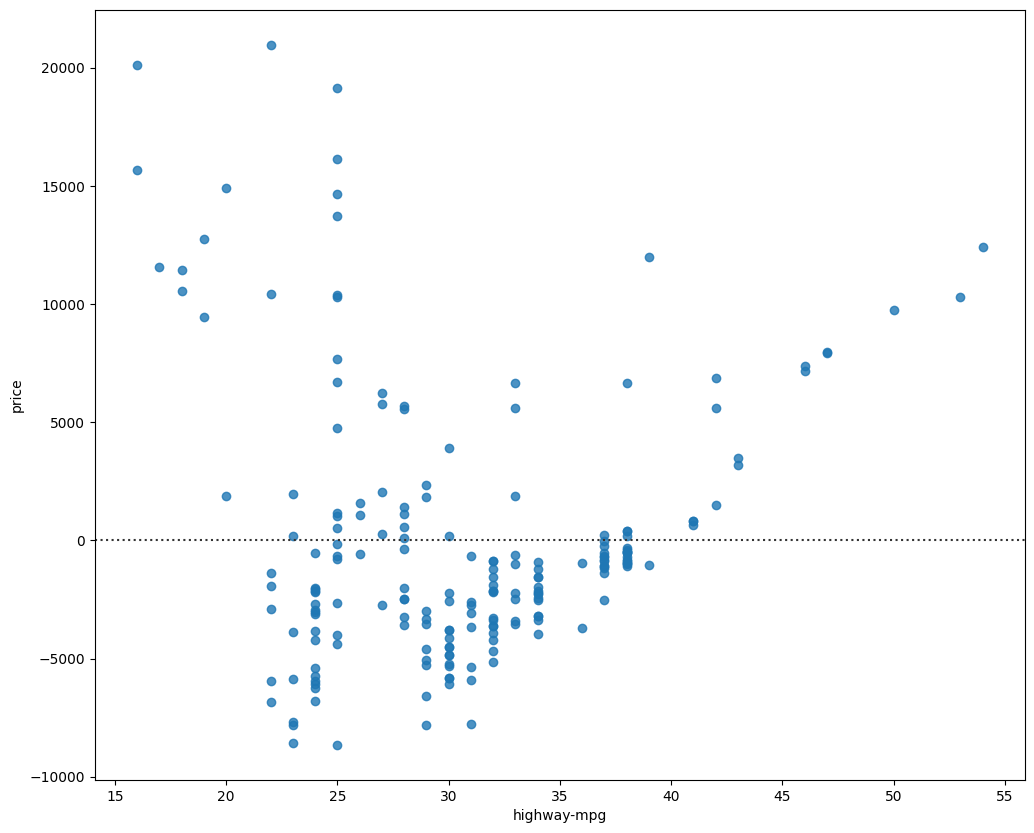

In [24]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [25]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
Y_hat = lm.predict(Z)

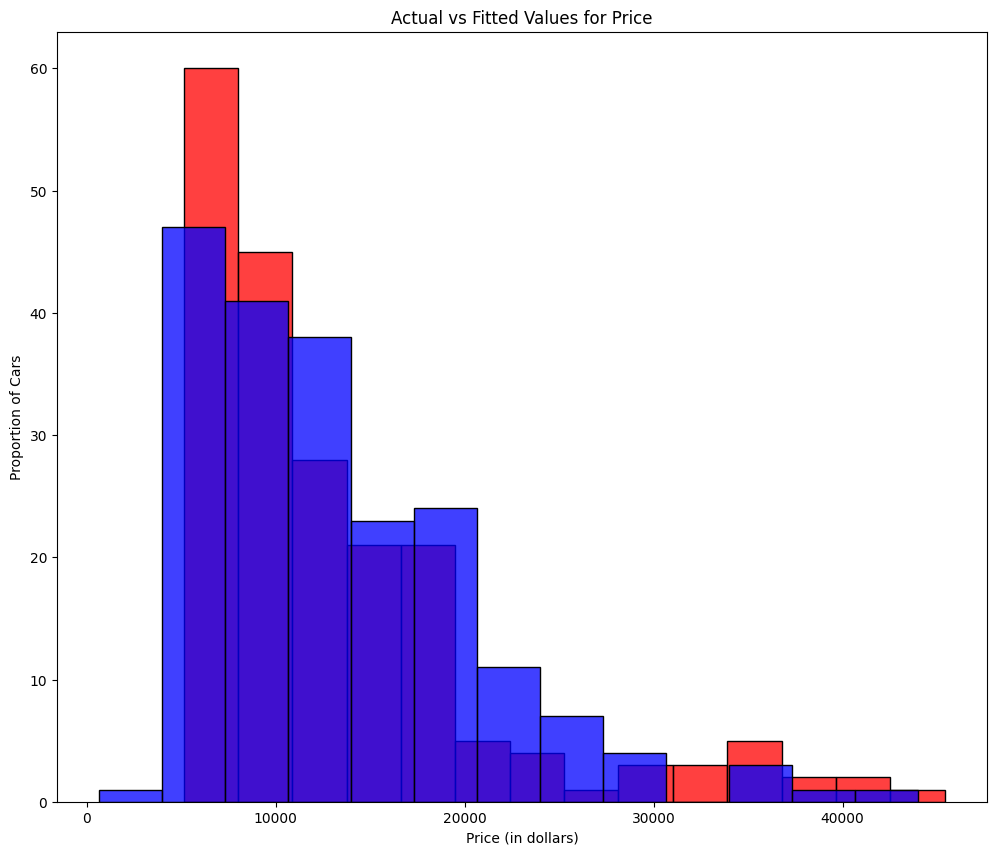

In [26]:
plt.figure(figsize=(width, height))


ax1 = sns.histplot(df['price'], color="r", label="Actual Value" )
sns.histplot(Y_hat, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [27]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [28]:
x = df['highway-mpg']
y = df['price']

In [53]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


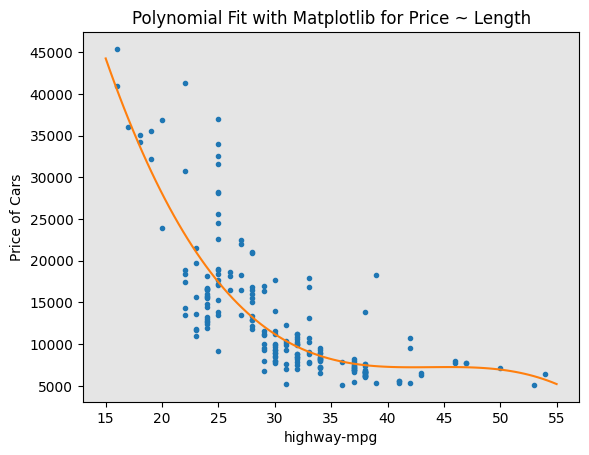

In [54]:
PlotPolly(p, x, y, 'highway-mpg')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


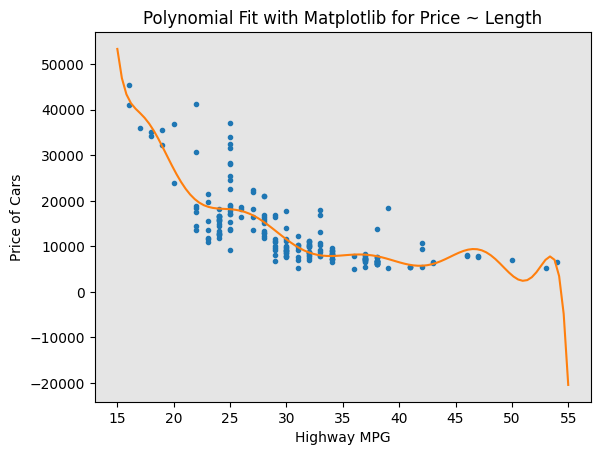

In [29]:
# Question #4 : Create 11 order polynomial model with the variables x and y from above.
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')


In [30]:
# We can perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [32]:
Z_pr = pr.fit_transform(Z)

In [33]:
Z.shape

(201, 4)

In [34]:
Z_pr.shape

(201, 15)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
# Creating Pipline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

Input = [('scale', StandardScaler()), ('polynomial',PolynomialFeatures(include_bias=False)), ('model', LinearRegression()) ]


In [37]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [38]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [39]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [40]:
# Question # 5:
# Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y

Input = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(Input)


In [41]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [42]:
ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## Evaluation

### Simple Linear Regression

In [43]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


In [44]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [13728.4631336  13728.4631336  17399.38347881 10224.40280408]


In [45]:
from sklearn.metrics import mean_squared_error

In [47]:
mse= mean_squared_error(df['price'], Yhat)

print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  15021126.02517414


### Multi Linear Regression

In [48]:
lm.fit(Z, df['price'])
print('The R-score is :' , lm.score(Z, df['price']))

The R-score is : 0.8093562806577457


In [49]:
Y_predict_multifit = lm.predict(Z)

In [ ]:
print('The mean square error of price and predicted value using multifit is: ', \
    mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


### Polynomial Fit

In [51]:
from sklearn.metrics import r2_score

In [55]:
r_squared = r2_score(y, p(x))
print('The R-squared value is : ', r_squared)

The R-squared value is :  0.674194666390652


### MSE

In [56]:
mean_squared_error(df['price'], p(x))

20474146.426361218

## Prediction

In [57]:
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [58]:
lm.fit(X, Y)
lm

LinearRegression()

In [59]:
yhat = lm.predict(new_input)
yhat[0:5]

f:\env\Temp\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782])

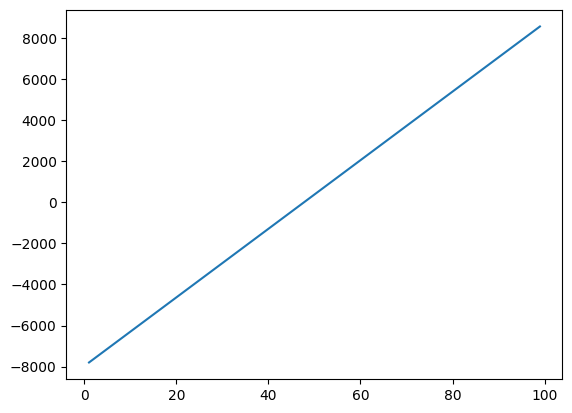

In [60]:
plt.plot(new_input, yhat)
plt.show()